In [1]:
"""Export the top TOP_USERS users by made comments"""

import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from tqdm import tqdm
from src.data.load_data import get_hackernews_files, load_hackernews_dataframe

files = get_hackernews_files()
global_user_action_count = None
TOP_USERS = 15000

for file_ in tqdm(files):
    try:
        df = load_hackernews_dataframe(file_)
    except MemoryError as _:
        continue
    df = df[df.type == 'comment']
    df = df.dropna(subset = ['text'])
    user_action_count = df.groupby('by').count()['id']
    if global_user_action_count is None:
        global_user_action_count = user_action_count
    else:
        global_user_action_count = global_user_action_count.add(user_action_count, fill_value=0)
    
    global_user_action_count = global_user_action_count.sort_values(ascending=False)[:TOP_USERS]

100%|██████████| 18/18 [12:09<00:00, 40.52s/it]


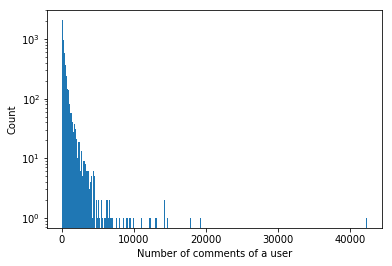

In [10]:
# Plot user comment distribution
global_user_action_count.hist(grid=False, bins=1000)
plt.yscale('log', nonposy='clip')
plt.xlabel('Number of comments of a user')
plt.ylabel('Count')
plt.show()

In [3]:
global_user_action_count.sort_values(ascending=False).to_csv("../data/processed/top_{}_users_comments.csv".format(TOP_USERS))